# A Linear Regression Project: E-commerce Customers

We’re working with a dataset provided by [Kaggle](https://www.kaggle.com/), which contains details
about customers on an e-commerce platform, including:

- **Avg. Session Length** – Typical length of in-store style advice sessions
- **Time on App** – Average app usage time (in minutes)
- **Time on Website** – Average website browsing time (in minutes)
- **Length of Membership** – Number of years each customer has been a member

The goal is to determine whether the company should invest more in improving the mobile app
experience or the website. Our analysis will help them make a decision supported by data.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Getting the Data

**Note**: As mentioned before, the data comes from a test dataset freely [available on Kaggle](https://www.kaggle.com/).
Note that this is a training set and the information does not correspond to real people.


In [4]:
df = pd.read_csv("ecommerce_data")

In [5]:
df.shape

(500, 8)

In [6]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

First we ask the following question: **How are the client’s time spent on each platform related to
the amount that they spend per year?**

There doesn't seem to be much correlation between the time on the desktop website with the amount
that clients spend per year. On the other side, the second graph shows that there seems to be a
small correlation between the time spent on the app and the yearly spending. This is probably
because these clients tend to spend less time browsing on the phone. Maybe the payment process is
faster on the app or the calls-to-action are more successful there.

After analyzing the pairplot, we see that there does seem to be one big positive correlation between
two variables: the length of membership and the yearly expenditure. In the end we recreate this plot
to visualize the regression line.


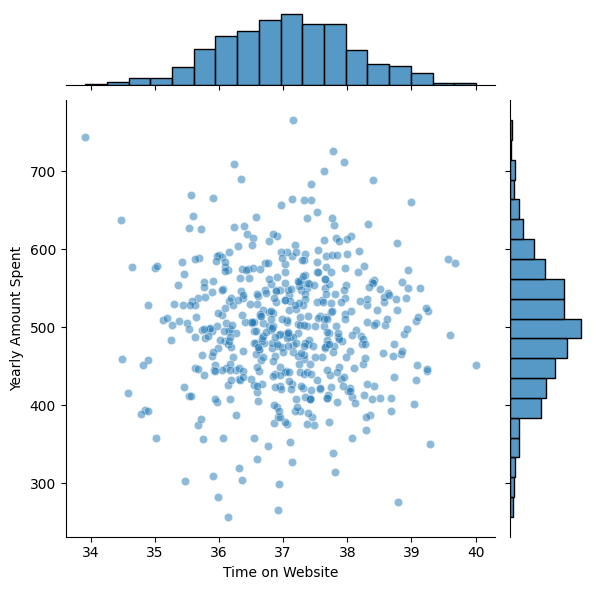

In [9]:
sns.jointplot(x = "Time on Website", y = "Yearly Amount Spent", data = df, alpha = 0.5)

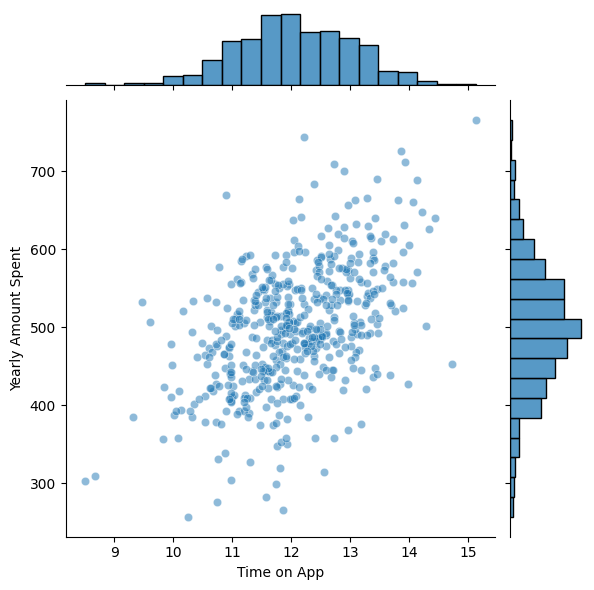

In [10]:
sns.jointplot(x = "Time on App", y = "Yearly Amount Spent", data = df, alpha = 0.5)

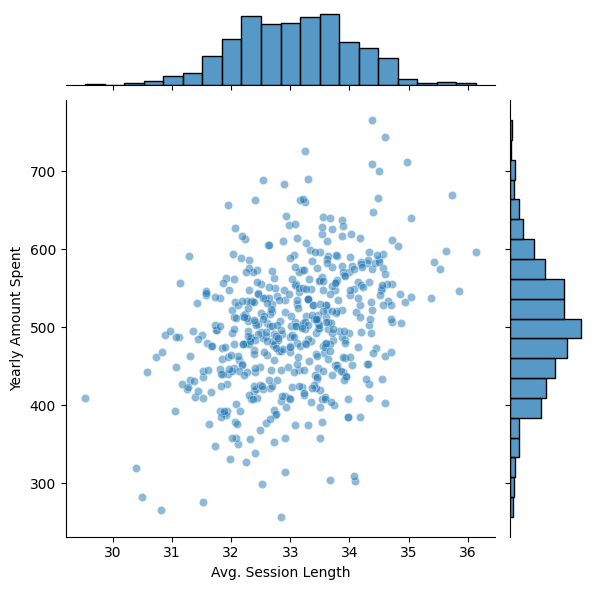

In [11]:
sns.jointplot(x = "Avg. Session Length", y = "Yearly Amount Spent", data = df, alpha = 0.5)

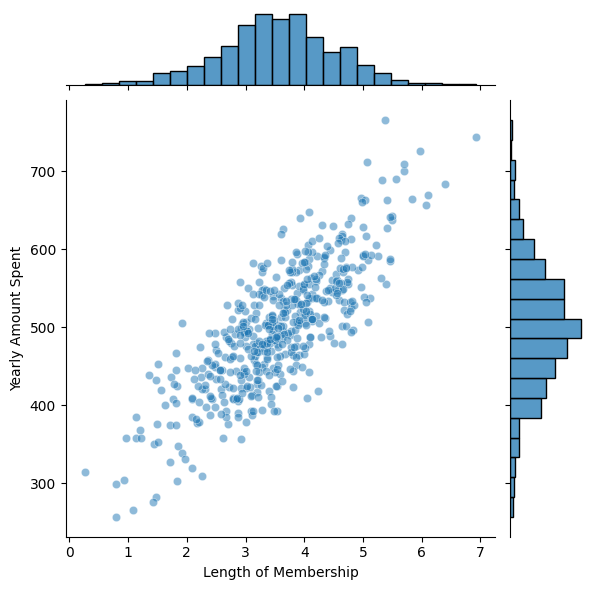

In [12]:
sns.jointplot(x = "Length of Membership", y = "Yearly Amount Spent", data = df, alpha = 0.5)

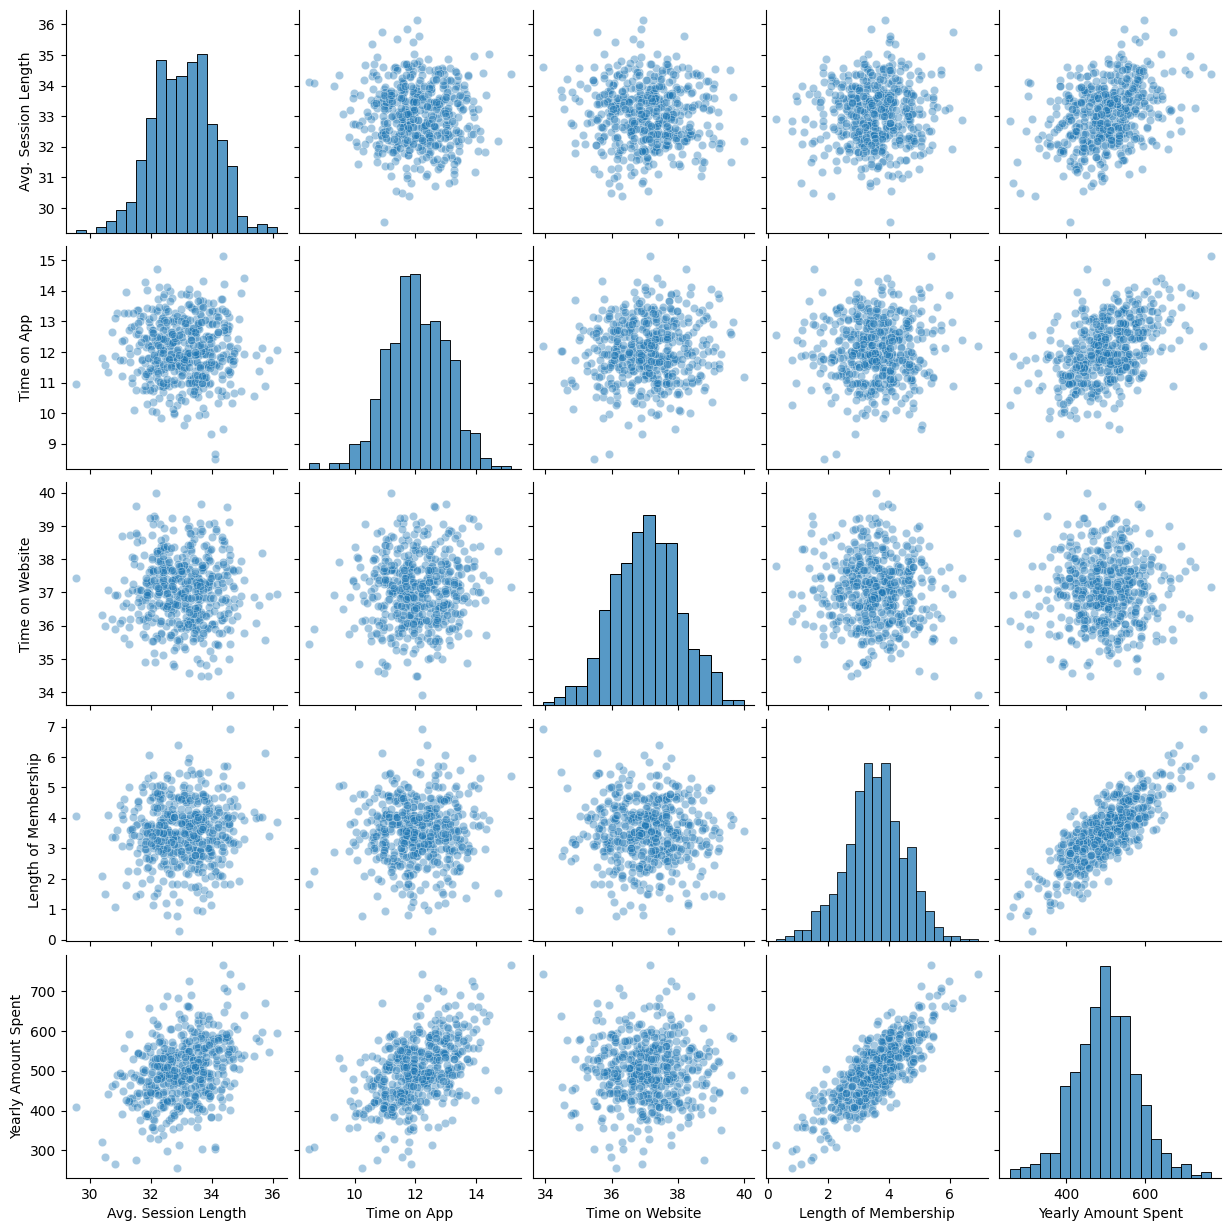

In [146]:
sns.pairplot(df, kind = "scatter", plot_kws = {"alpha": 0.4})

## Splitting the data

**X** are the predictors, and **y** is the output. What we want to do is create a model that will
take in the values in the X variable and predict y with a linear regression algorithm. We will use
the **SciKit Learn** library to create the model.


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df[["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership"]]

In [15]:
y = df["Yearly Amount Spent"]

In [16]:
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [17]:
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 9)

In [24]:
X_train.shape

(375, 4)

In [25]:
X_test.shape

(125, 4)

In [26]:
y_test.shape

(125,)

In [27]:
y_train.shape

(375,)

In [28]:
X_train.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
count,375.000000,375.000000,375.000000,375.000000
mean,33.041036,12.070365,37.015718,3.506237
std,1.012330,0.987316,0.991509,1.009418
min,29.532429,8.508152,33.913847,0.269901
25%,32.379512,11.476076,36.346012,2.915940
50%,33.076536,11.971751,37.061689,3.471919
75%,33.700643,12.742144,37.682139,4.088584
max,36.139662,15.126994,39.672591,6.922689


In [29]:
X_test.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
count,125.000000,125.000000,125.000000,125.000000
mean,33.089666,11.998855,37.194629,3.615136
std,0.933707,1.016762,1.058172,0.967576
min,30.737720,8.668350,34.779751,1.130477
25%,32.288667,11.202670,36.360247,3.108911
50%,33.136655,12.039648,37.133127,3.675849
75%,33.811733,12.795189,37.909139,4.222436
max,35.530904,14.715388,40.005182,5.976768


In [30]:
y_train.describe()

count    375.000000
mean     497.674887
std       80.254507
min      256.670582
25%      443.319541
50%      497.389558
75%      548.705947
max      765.518462
Name: Yearly Amount Spent, dtype: float64

In [31]:
y_test.describe()

count    125.000000
mean     504.231493
std       76.529686
min      308.527747
25%      461.112248
50%      505.113344
75%      551.620145
max      725.584814
Name: Yearly Amount Spent, dtype: float64

## Training the Model with multivariable regression using Scikit Learn

In this section, we create the model and feed the training data to it. This model will tell us which
input has the biggest impact in the output (yearly expenditure). As the plots suggested, we find
that the most important coefficient is that of the “Length of Membership” predictor, followed by
the “Time on App” and the “Avg. Session Length.” The time on website does not seem to be an
important factor to the amount a customer spends per year.


In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lm = LinearRegression()

In [34]:
lm.fit(X_train, y_train)

LinearRegression()

In [35]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns = ["Coefficient"])
cdf

,Coefficient
Avg. Session Length,25.868556
Time on App,38.623541
Time on Website,0.105922
Length of Membership,61.509967


## Predicting Test Data

Now that the model is trained, we should be able to use it to make our predictions and evaluate our model. The scatter plot below plots the actual y values to the model's predictions. The model seems to behave accurately.


In [36]:
predictions = lm.predict(X_test)

Text(0.5, 0, 'Predictions')

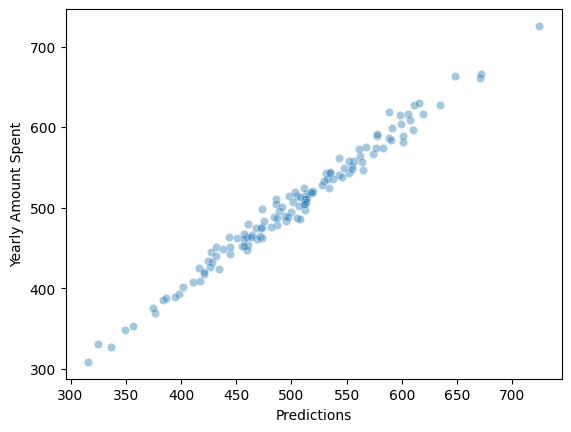

In [235]:
sns.scatterplot(x = predictions, y = y_test, alpha = 0.4)
plt.xlabel("Predictions")

## Evaluation of the Model

We use **scikit-learn** metrics to evaluate how well our linear regression model performs on the test data. Specifically, we compute:

- **Mean Absolute Error (MAE):** Measures the average magnitude of the errors. Lower values indicate fewer overall errors.
- **Mean Squared Error (MSE):** Similar to MAE, but squares the errors before averaging, making larger errors more influential.
- **Root Mean Squared Error (RMSE):** The square root of MSE. It's often on the same scale as the target variable.

These metrics help us understand both the typical size of our model's errors and how severe larger errors can be.


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [39]:
print("Mean Absolute Error:", mean_absolute_error(y_test, predictions))
print("Mean Squared Error:", mean_squared_error(y_test, predictions))
print("RMSE:", math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 7.852678526218984
Mean Squared Error: 98.74400974890848
RMSE: 9.937002050362498


## Residuals

A **residual** is the difference between the observed value and the value predicted by our model.
Analyzing the distribution of these residuals is an important step to check if the assumptions of
linear regression are satisfied—particularly, we want to see if they are normally distributed.

Below is a distribution plot of the model’s residuals. If the residuals appear close to a bell curve
shape, it suggests our model’s predictions do not exhibit strong bias and might be suitable for
linear regression assumptions.


In [245]:
residuals = y_test - predictions
residuals

370    1.684310
256   -8.431094
124    9.052817
320   -7.897017
322   -9.113443
         ...   
257    7.213226
138   -5.046412
465    8.336152
456   -5.731150
21    -1.161721
Name: Yearly Amount Spent, Length: 125, dtype: float64

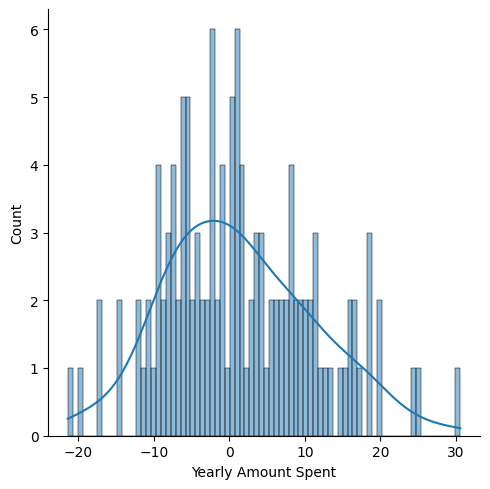

In [246]:
sns.displot(residuals, bins = 80, kde = True)

## Normal Probability Plot (Q–Q Plot)

A Q–Q plot helps us visually assess how closely our residuals follow a normal (Gaussian) distribution. 
If the points lie roughly along the diagonal line, this indicates that the residuals are approximately 
normally distributed, which is one of the assumptions for linear regression.

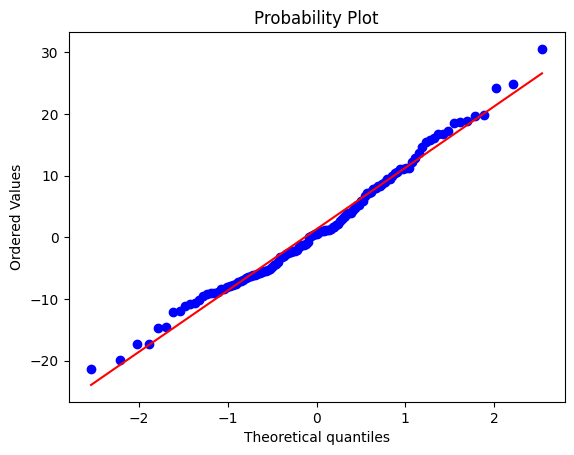

In [249]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)
pylab.show()

## Conclusion

Interpreting these findings can be challenging. Based on our model, the length of membership stands
out as the most influential factor for customers—surpassing the time spent on the app or website.
Among the two predictors (desktop vs. app), the app shows a much stronger effect. In fact, time
spent on the desktop website appears unrelated to how much customers spend.

There are two potential interpretations. First, the desktop website might need further improvements
to encourage higher spending. Second, it could be that people are more influenced by mobile apps
than by desktop sites, suggesting a need to capitalize on that preference. Of course, understanding
these insights fully requires expertise in online marketing. Nonetheless, our analysis and model
provide a solid basis for weighing the importance of each predictor.
